In [7]:
%load_ext autoreload
%autoreload 2

from algorithms.number_theory import fermat_strong_test, linear_sieve, fermat_test, Pollard_rho_factor, Pollard_pm1, lucas_selfridge_test
import numpy as np

In [89]:
max_n = int(1e7)
primes, _ = np.array(linear_sieve(max_n))
primes_set = set(primes)
# odd composite numbers 
composites = np.array([i for i in range(9, max_n, 2) if i not in primes_set])

<ipython-input-89-b800a76570f3>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  primes, _ = np.array(linear_sieve(max_n))


In [11]:
primes[:20]

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]

In [12]:
composites[:20]

[9, 15, 21, 25, 27, 33, 35, 39, 45, 49, 51, 55, 57, 63, 65, 69, 75, 77, 81, 85]

# Analyse pseudo-primes

In [90]:
# Fermat strorng pseudoprimes base a
fs2_pp_mask = [fermat_strong_test(i, 2) for i in composites.tolist()]
fs2_pp = composites[fs2_pp_mask]

In [92]:
# This is A001262 sequence (https://oeis.org/A001262)
fs2_pp

array([   2047,    3277,    4033,    4681,    8321,   15841,   29341,
         42799,   49141,   52633,   65281,   74665,   80581,   85489,
         88357,   90751,  104653,  130561,  196093,  220729,  233017,
        252601,  253241,  256999,  271951,  280601,  314821,  357761,
        390937,  458989,  476971,  486737,  489997,  514447,  580337,
        635401,  647089,  741751,  800605,  818201,  838861,  873181,
        877099,  916327,  976873,  983401, 1004653, 1016801, 1023121,
       1082401, 1145257, 1194649, 1207361, 1251949, 1252697, 1302451,
       1325843, 1357441, 1373653, 1397419, 1441091, 1493857, 1507963,
       1509709, 1530787, 1678541, 1730977, 1811573, 1876393, 1907851,
       1909001, 1969417, 1987021, 2004403, 2081713, 2181961, 2205967,
       2264369, 2269093, 2284453, 2304167, 2387797, 2419385, 2510569,
       2746477, 2748023, 2757241, 2811271, 2909197, 2953711, 2976487,
       3090091, 3116107, 3125281, 3375041, 3400013, 3429037, 3539101,
       3567481, 3581

In [147]:
# estimate probability that odd composite number is pseudoprime:
len(fs2_pp), len(fs2_pp) / len(composites)

(162, 3.736661330006936e-05)

In [145]:
# Lucas Selfridge strong pseudoprimes
# oesis sequence: https://oeis.org/A217255 
ls_pp_mask = [lucas_selfridge_test(i) for i in composites.tolist()]
ls_pp = composites[ls_pp_mask]
ls_pp

array([   5459,    5777,   10877,   16109,   18971,   22499,   24569,
         25199,   40309,   58519,   75077,   97439,  100127,  113573,
        115639,  130139,  155819,  158399,  161027,  162133,  176399,
        176471,  189419,  192509,  197801,  224369,  230691,  231703,
        243629,  253259,  268349,  288919,  313499,  324899,  353219,
        366799,  391169,  430127,  436409,  455519,  487199,  510479,
        572669,  611399,  622169,  635627,  636199,  701999,  794611,
        835999,  839159,  851927,  871859,  875879,  887879,  895439,
        950821,  960859, 1033997, 1106327, 1241099, 1256293, 1308119,
       1311389, 1388903, 1422319, 1501439, 1697183, 1711469, 1777159,
       1981559, 2003579, 2263127, 2435423, 2461211, 2518889, 2566409,
       2624399, 2662277, 2666711, 2690759, 2738969, 2782079, 2828699,
       2942081, 2952071, 3109049, 3165119, 3175883, 3179609, 3204599,
       3373649, 3399527, 3410531, 3441239, 3452147, 3479111, 3498879,
       3579599, 3684

In [146]:
len(ls_pp), len(ls_pp) / len(comps)

(178, 0.000178)

In [148]:
# first intersection is of order 10^10000 !
set(ls_pp) & set(fs2_pp)

set()

In [150]:
# Fermat pseudo primes with bases 3 and 5 
fs3_pp_mask = [fermat_strong_test(i, 3) for i in composites.tolist()]
fs3_pp = composites[fs3_pp_mask]
fs3_pp

array([    121,     703,    1891,    3281,    8401,    8911,   10585,
         12403,   16531,   18721,   19345,   23521,   31621,   44287,
         47197,   55969,   63139,   74593,   79003,   82513,   87913,
         88573,   97567,  105163,  111361,  112141,  148417,  152551,
        182527,  188191,  211411,  218791,  221761,  226801,  228073,
        282133,  288163,  293401,  313447,  320167,  327781,  328021,
        340033,  359341,  364231,  365713,  385003,  385201,  399001,
        432821,  443713,  453259,  478297,  497503,  504913,  512461,
        551881,  563347,  625873,  638731,  655051,  658711,  679057,
        709873,  801139,  823213,  859951,  867043,  876961,  894781,
        951481,  973241,  994507, 1024651, 1042417, 1097227, 1152271,
       1193221, 1226413, 1241143, 1244161, 1266151, 1268551, 1373653,
       1530787, 1551941, 1561921, 1563151, 1584133, 1590751, 1592137,
       1627921, 1638781, 1683683, 1690501, 1702537, 1729729, 1772611,
       1773289, 1817

In [151]:
len(fs3_pp)

207

In [152]:
fs5_pp_mask = [fermat_strong_test(i, 5) for i in composites.tolist()]
fs5_pp = composites[fs5_pp_mask]
fs5_pp

array([    781,    1541,    5461,    5611,    7813,   13021,   14981,
         15751,   24211,   25351,   29539,   38081,   40501,   44801,
         53971,   79381,  100651,  102311,  104721,  112141,  121463,
        133141,  141361,  146611,  195313,  211951,  216457,  222301,
        251521,  289081,  290629,  298271,  315121,  315283,  318551,
        319507,  326929,  341531,  353827,  375601,  416641,  432821,
        453331,  464881,  498451,  544541,  552451,  555397,  556421,
        559903,  561601,  578771,  656209,  753667,  764941,  818749,
        851201,  863329,  868321,  872101,  882601,  886411,  939727,
        965581, 1024651, 1052941, 1127089, 1138861, 1164083, 1194761,
       1197761, 1246969, 1285579, 1297951, 1314631, 1359721, 1370881,
       1386701, 1463749, 1563151, 1576261, 1627921, 1653667, 1663213,
       1703677, 1809697, 1857241, 1907851, 1934251, 1958503, 1963501,
       1973089, 2029969, 2104589, 2165801, 2255843, 2295871, 2299081,
       2339377, 2423

In [154]:
len(fs5_pp)

199

In [157]:
print(len(set(fs2_pp) & set(fs3_pp)))
set(fs2_pp) & set(fs3_pp)


7


{1373653, 1530787, 1987021, 2284453, 3116107, 5173601, 6787327}

In [158]:
# No intersection up to 10^9
set(fs2_pp) & set(fs3_pp) & set(fs5_pp)

set()

### Fermat pseudo primes vs Fermat strong pseudo primes

In [159]:
f2w_pp_mask = [fermat_test(i, 2) for i in composites.tolist()]
f2w_pp = composites[f2w_pp_mask]


In [160]:
len(f2w_pp)

750

In [164]:
f3w_pp_mask = [fermat_test(i, 2) for i in composites.tolist()]
f3w_pp = composites[f3w_pp_mask]


In [165]:
fw_pp = set(f2w_pp) & set(f3w_pp)
print(len(fw_pp))
fw_pp

750


{341,
 561,
 645,
 1105,
 1387,
 1729,
 1905,
 2047,
 2465,
 2701,
 2821,
 3277,
 4033,
 4369,
 4371,
 4681,
 5461,
 6601,
 7957,
 8321,
 8481,
 8911,
 10261,
 10585,
 11305,
 12801,
 13741,
 13747,
 13981,
 14491,
 15709,
 15841,
 16705,
 18705,
 18721,
 19951,
 23001,
 23377,
 25761,
 29341,
 30121,
 30889,
 31417,
 31609,
 31621,
 33153,
 34945,
 35333,
 39865,
 41041,
 41665,
 42799,
 46657,
 49141,
 49981,
 52633,
 55245,
 57421,
 60701,
 60787,
 62745,
 63973,
 65077,
 65281,
 68101,
 72885,
 74665,
 75361,
 80581,
 83333,
 83665,
 85489,
 87249,
 88357,
 88561,
 90751,
 91001,
 93961,
 101101,
 104653,
 107185,
 113201,
 115921,
 121465,
 123251,
 126217,
 129889,
 129921,
 130561,
 137149,
 149281,
 150851,
 154101,
 157641,
 158369,
 162193,
 162401,
 164737,
 172081,
 176149,
 181901,
 188057,
 188461,
 194221,
 196021,
 196093,
 204001,
 206601,
 208465,
 212421,
 215265,
 215749,
 219781,
 220729,
 223345,
 226801,
 228241,
 233017,
 241001,
 249841,
 252601,
 253241,
 2569

In [169]:
2 ** 340 % 341 

1

In [171]:
d = 340 // 4
2 ** (d - 1) % d, d

(16, 85)

In [140]:
inv2 = powmod(2, n - 2, n)

def div2(x, n):
    if n % 2 == 1:
        x += n
    return x // 2 % n

def lucas_double(u_k, v_k, k):
    # computes U_k, V_k -> U_2k, V_2k
    return u_k * v_k % n, (v_k * v_k + -2 * powmod(q, k, n)) % n

def lucas_sum(u_k, v_k, u_m, v_m):
    u_km = div2(u_k * v_m + u_m * v_k, n)
    v_km = (v_k * v_m + D * u_k * u_m)  % n
    return u_km, v_km

In [141]:
lucas_sum(u[1], v[1], u[2], v[2])

(93, 87)

In [122]:
list(zip(range(len(u)), u, v))

[(0, 0, 2),
 (1, 1, 1),
 (2, 1, 90),
 (3, 93, 87),
 (4, 90, 7),
 (5, 1, 31),
 (6, 16, 10),
 (7, 13, 12),
 (8, 60, 77),
 (9, 21, 41),
 (10, 31, 0),
 (11, 63, 67),
 (12, 65, 67),
 (13, 66, 56),
 (14, 61, 45),
 (15, 53, 67),
 (16, 60, 27),
 (17, 91, 16),
 (18, 6, 30),
 (19, 18, 77),
 (20, 0, 82),
 (21, 41, 41),
 (22, 41, 80),
 (23, 13, 52),
 (24, 80, 2),
 (25, 41, 36),
 (26, 86, 30),
 (27, 58, 17),
 (28, 85, 22),
 (29, 6, 66),
 (30, 36, 0),
 (31, 18, 87),
 (32, 5, 87),
 (33, 46, 16),
 (34, 31, 40),
 (35, 83, 87),
 (36, 85, 62),
 (37, 26, 86),
 (38, 56, 90),
 (39, 73, 22),
 (40, 0, 37),
 (41, 66, 66),
 (42, 66, 50),
 (43, 58, 42),
 (44, 50, 82),
 (45, 66, 51),
 (46, 11, 90),
 (47, 3, 32),
 (48, 65, 47),
 (49, 56, 46),
 (50, 51, 0),
 (51, 73, 52),
 (52, 15, 52),
 (53, 81, 86),
 (54, 36, 25),
 (55, 78, 52),
 (56, 65, 72),
 (57, 21, 11),
 (58, 16, 80),
 (59, 48, 47),
 (60, 0, 92),
 (61, 46, 46),
 (62, 46, 55),
 (63, 3, 12),
 (64, 55, 37),
 (65, 46, 1),
 (66, 71, 80),
 (67, 28, 77),
 (68, 5, 2

# Analyze factorization methods

In [1]:
from algorithms.number_theory import Pollard_rho_factor

In [179]:
from random import randint
from math import gcd, sqrt

from algorithms.number_theory import powmod

"""Count number of steps during factorization"""

def Pollard_rho_Floyd(n, x0=2, c=1):
    """Pollard's Rho method
    Attempts to find a divisor using pollard rho method
    with Floyd cycle finding algorithm.

    Returns either any prime factor of n or n itself.

    If n = p*q then algorithm exits approximately in O(p^(1/4))
    """

    def f(x):
        return (x * x + c) % n

    x, y, g = x0, x0, 1
    steps = 0
    while g == 1:
        steps += 1
        x = f(x)
        y = f(f(y))
        g = gcd(abs(x - y), n)
    return g, steps


def Pollard_rho_factor(n, check_prime=False):
    if check_prime and Miller_Rabin_test(n):
        return n

    nstesps, maxsteps = 0, 0
    while True:
        x0 = randint(2, n - 1)
        c = randint(1, n - 1)
        g, s = Pollard_rho_Floyd(n, x0, c)
        nstesps, maxsteps = nstesps + s, max(maxsteps, s)
        if g != n:
            return g, sqrt(sqrt(g)), nstesps, maxsteps

def Pollard_pm1(n, primes, max_B=1000000):
    """Pollard's p - 1 method
    Attempts to find some B-powersmooth factor of n

    Fcator p is B-powersmooth if p - 1 = p1^d1 * ... * pn^dn
    and max(p1, ..., pn) < B

    Parameters
    ----------
    n : int
        integer to factorize
    primes : list
        sorted list of primes < max_B
    max_B : int
        maximal powersmoothness of extracted factor
    """
    B = 10
    g = 1
    sm_steps, b_steps = 0, 0
    while B < max_B and g < n:
        a = randint(2, n - 2)
        g = gcd(a, n)
        b_steps += 1
        if g != 1:
            return g, sm_steps, b_steps
        for p in primes:
            if p >= B:
                break
            sm_steps += 1
            pd = 1  # p^d
            while pd * p <= B:
                pd *= p
            a = powmod(a, pd, n)
            g = gcd(a - 1, n)
            if g != 1 and g != n:
                return g, sm_steps, b_steps
        B *= 2
    return 1, sm_steps, b_steps

In [6]:
Pollard_rho_factor(27)

9

In [173]:
comps = composites[1000000:2000000]
factors = [Pollard_pm1(n, primes) for n in comps]

In [174]:
ok = list(i % d[0] == 0 and i != d[0] for i, d in zip(comps, factors))
np.all(ok) # all factorized correctly

True

In [175]:
factors2 = [Pollard_rho_factor(n) for n in comps]

In [176]:
ok = list(i % d[0] == 0 and i != d[0] for i, d in zip(comps, factors2))
ok = np.all(ok)
ok

True

/Users/vadimadr/opt/conda_arm/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


440

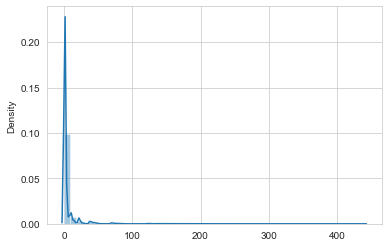

In [178]:
# number of steps for Pollard p-1
sns.distplot(np.array(factors)[:, 1])
np.array(factors)[:, 1].max()

/Users/vadimadr/opt/conda_arm/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


155.0

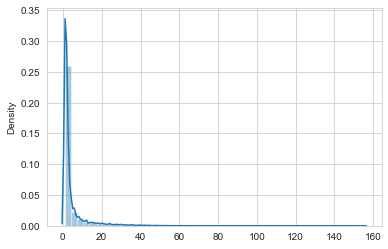

In [183]:
# number of steps for Pollard rho
sns.distplot(np.array(factors2)[:, 2])
np.array(factors2)[:, 2].max()

/Users/vadimadr/opt/conda_arm/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


146.0

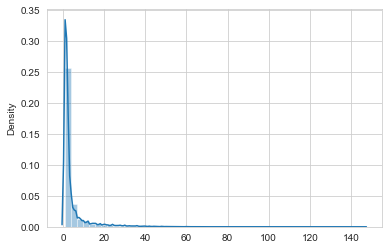

In [182]:
# number of steps for Pollard rho
sns.distplot(np.array(factors2)[:, 3])
np.array(factors2)[:, 3].max()

In [186]:
Pollard_rho_factor(primes[100500]*primes[333111])

(4763923, 46.718746663558825, 91, 91)

In [187]:
Pollard_rho_factor(primes[100501]*primes[233111])

(3242947, 42.436051006781035, 122, 122)

In [189]:
Pollard_rho_factor(primes[130501]*primes[233141])

(1734203, 36.28899854525313, 2545, 2545)